# Exploratory Data Analysis (EDA)

## Variation

In [5]:
suppressMessages(library(tidyverse))
options(warn = -1)

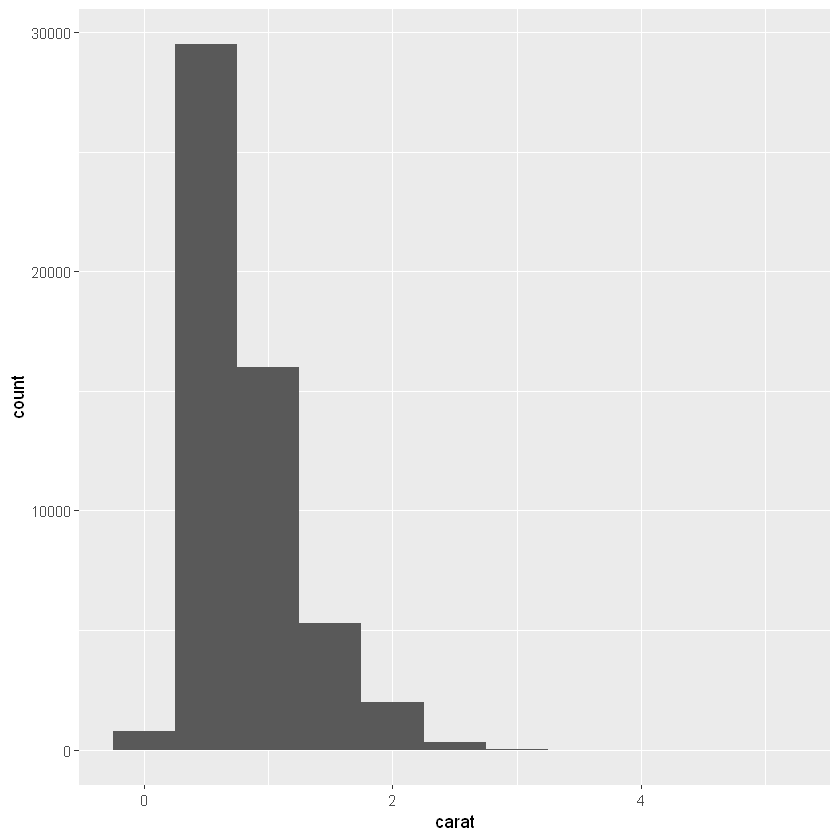

In [6]:
ggplot(diamonds, aes(x = carat)) +
    geom_histogram(binwidth = 0.5)

Some questions to ask:
- Which values are the most common and why
- Which values are rare and why? Does that match your expectation
- Is there any unusual pattern? What might explain them

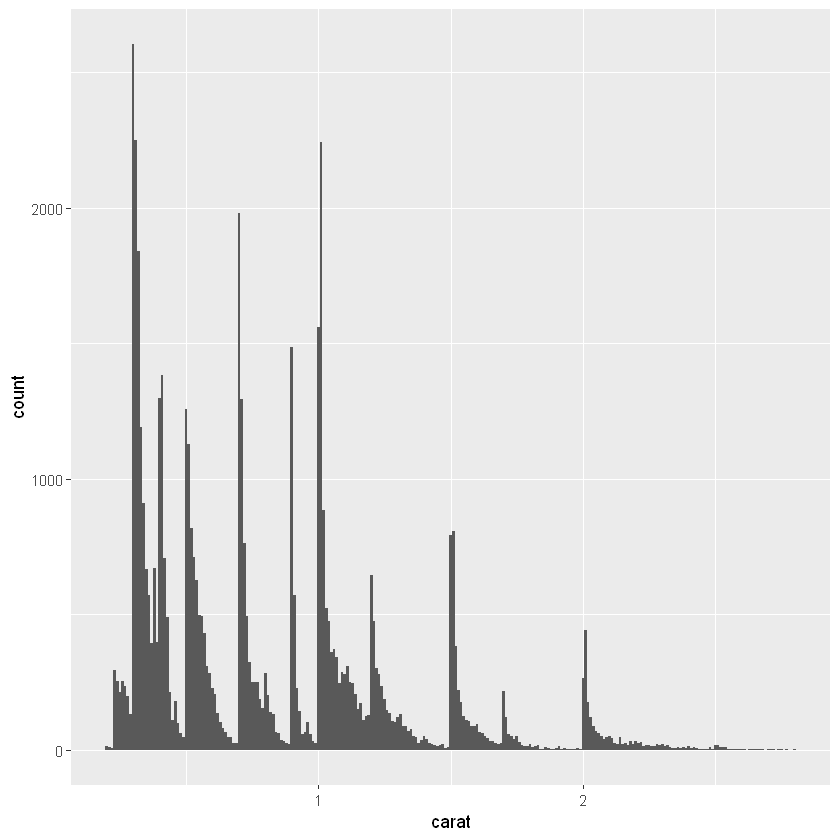

In [7]:
# visualizing the distribution of carat for smaller diamonds
smaller = diamonds %>% filter(carat < 3)

ggplot(smaller, aes(x = carat)) +
    geom_histogram(binwidth = 0.01)

- Why more diamonds at whole carats and common fractions of carats
- Why more diamonds slightly to the right of each peak than the left of each peak

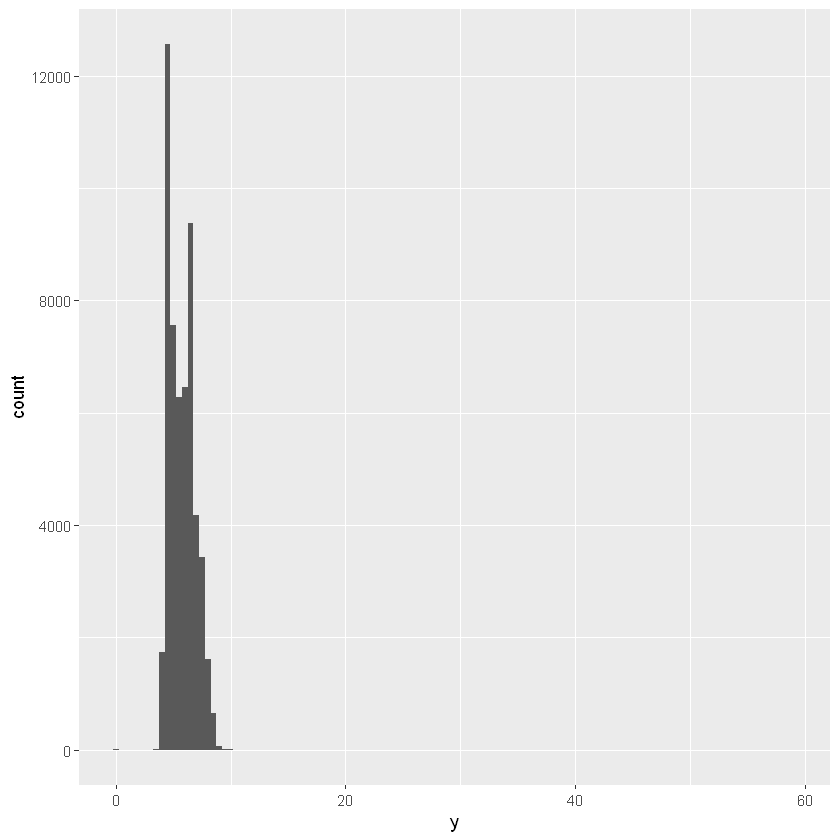

In [9]:
# outliers
ggplot(diamonds, aes(x = y)) +
    geom_histogram(binwidth = 0.5)

- We can see an unusually wide limits on the x-axis
- To see these values easily, we need to zoom to small values of the y-axis

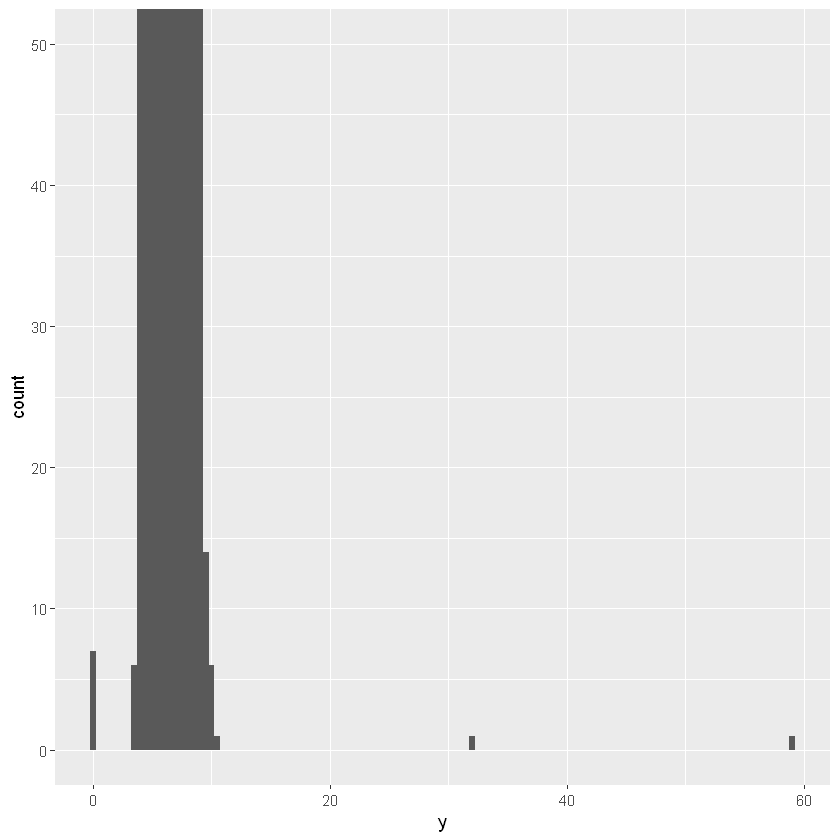

In [10]:
# zoom in
ggplot(diamonds, aes(x = y)) +
    geom_histogram(binwidth = 0.5) +
    coord_cartesian(ylim = c(0,50))

In [11]:
# lets look at the outliers
unsual = diamonds %>%
    filter(y > 20 | y < 3) %>%
    select(price, x, y, z) %>%
    arrange(y)

unsual

price,x,y,z
<int>,<dbl>,<dbl>,<dbl>
5139,0.00,0.0,0.00
6381,0.00,0.0,0.00
12800,0.00,0.0,0.00
15686,0.00,0.0,0.00
18034,0.00,0.0,0.00
2130,0.00,0.0,0.00
2130,0.00,0.0,0.00
2075,5.15,31.8,5.12
12210,8.09,58.9,8.06


The y variable measures one of the three dimensions of these diamonds, in mm. We know that diamonds can’t have a width of 0mm, so these values must be incorrect. By doing EDA, we have discovered missing data that were coded as 0, which we never
would have found by simply searching for NAs. Going forward we might choose to re-code these values as NAs to prevent misleading calculations. We might also suspect that measurements of 32mm and 59mm are implausible: those diamonds are more than an inch long but don’t cost hundreds of thousands of dollars

## Unsual Values

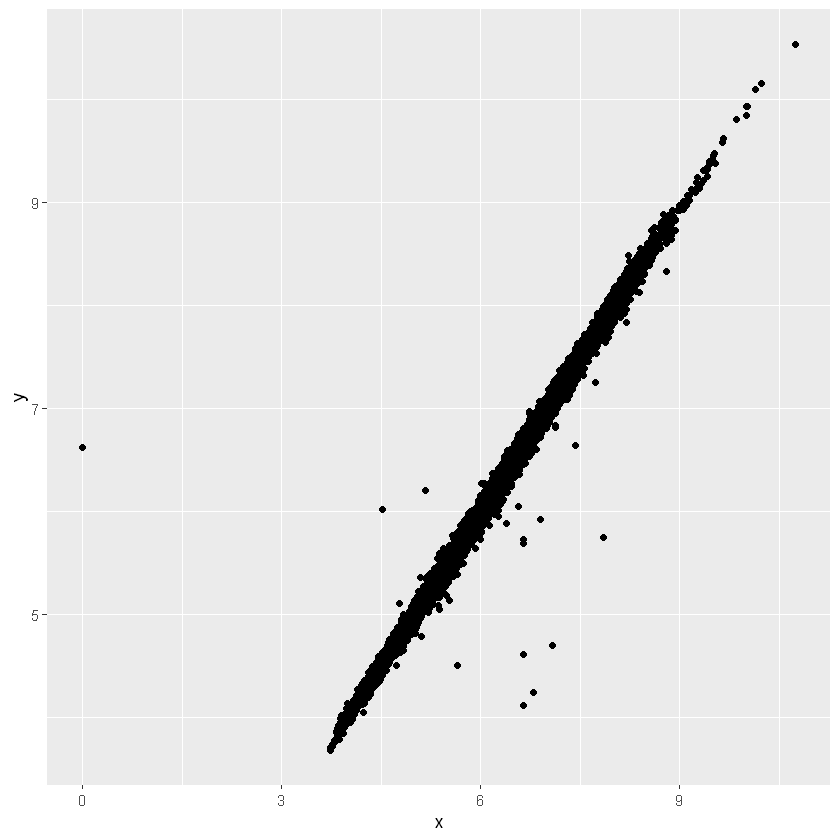

In [12]:
# replace unsual values with missing values
diamonds2 = diamonds %>%
    mutate(y = ifelse(y > 20 | y < 3, NA, y))

# lets visualize the distribution of y again
ggplot(diamonds2, aes(x = x, y = y)) +
    geom_point()

Now we will learn what makes observations with missing values different to observations with recorded values. 

There are missing values in the `dep_time` that indicate the flight was cancelled. We will compare the scheduled departure times for cancelled and non-cancelled times. 

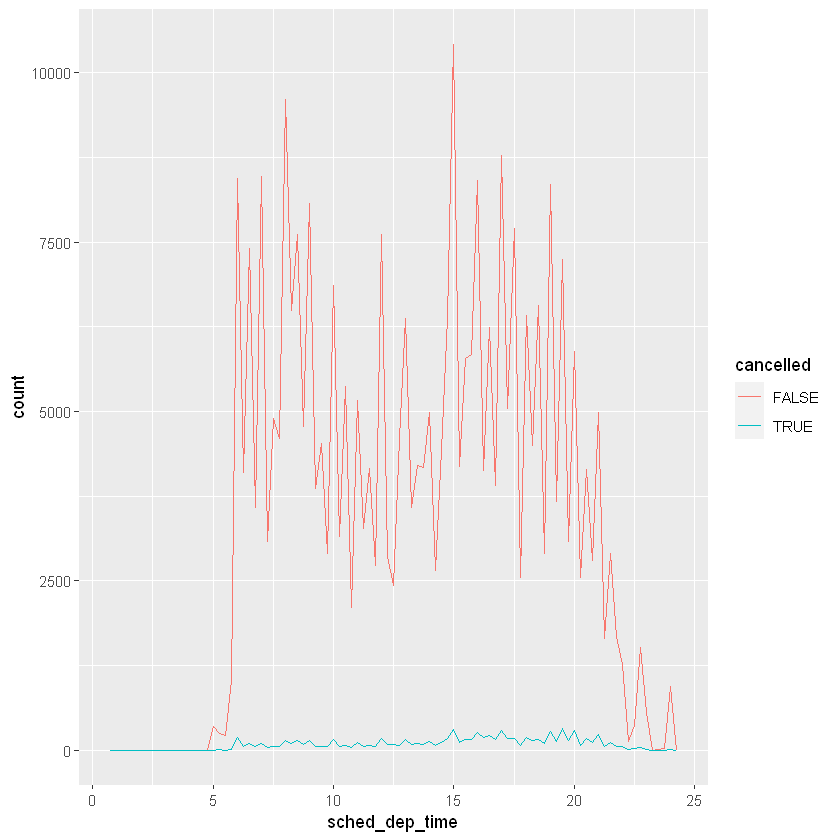

In [15]:
nycflights13::flights %>%
    mutate(
        cancelled = is.na(dep_time),
        sched_hour = sched_dep_time %/% 100,
        sched_min = sched_dep_time %% 100,
        sched_dep_time = sched_hour + sched_min / 60
    ) %>%
    ggplot(aes( x = sched_dep_time)) +
    geom_freqpoly(aes(color = cancelled), binwidth = 1/4)

## Covariation

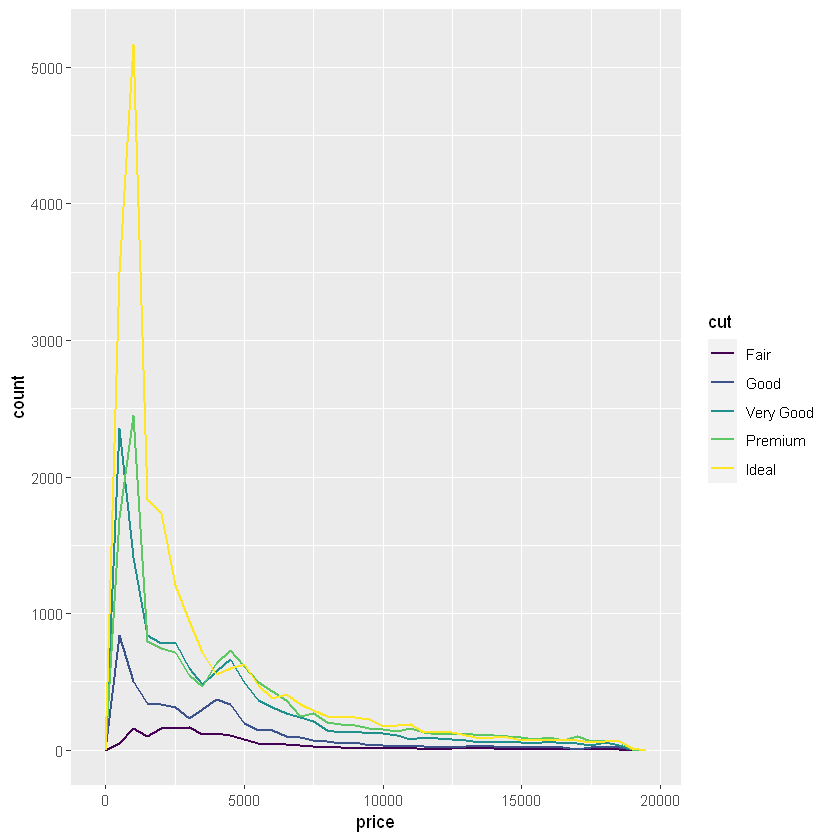

In [16]:
# price of diamonds varies with the quality
ggplot(diamonds, aes(x = price)) +
    geom_freqpoly(aes(color = cut), binwidth = 500, linewidth = 0.75)

The height, determined by the overall count, differs so much across cuts, making it hard to see the differences in the shapes of their distributions. So we cannot use only `geom_freqpoly` default parameters. Instead of displaying count, we'll display the density

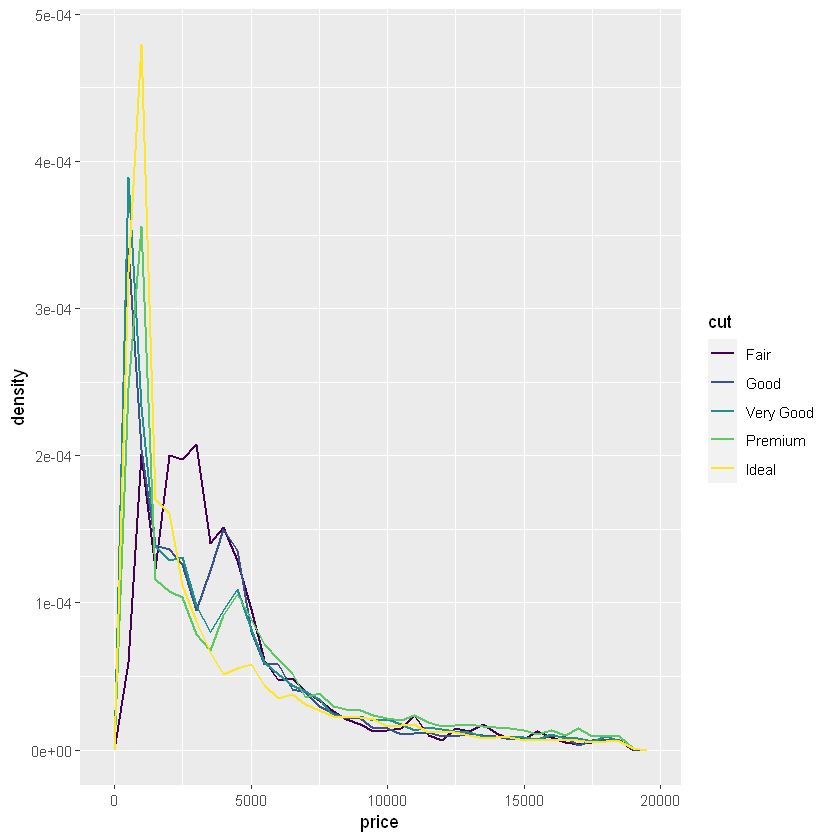

In [18]:
ggplot(diamonds, aes(x = price, y = after_stat(density))) +
    geom_freqpoly(aes(color = cut), binwidth = 500, linewidth = 0.75)

It appears fair diamonds have the average price. Let's verify.

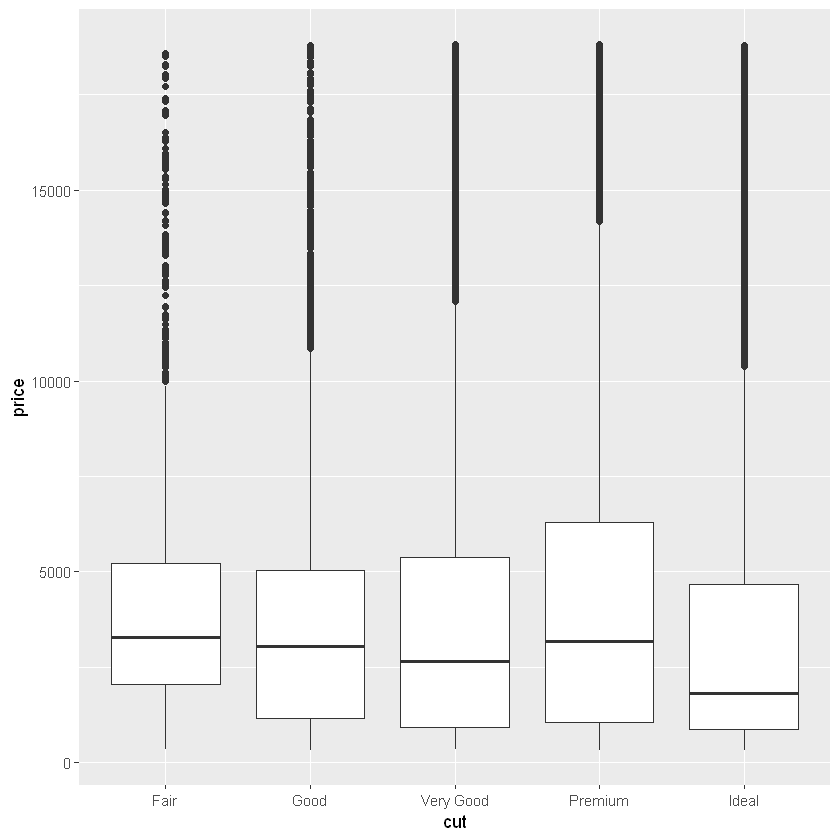

In [19]:
ggplot(diamonds, aes(x = cut, y = price)) +
    geom_boxplot()

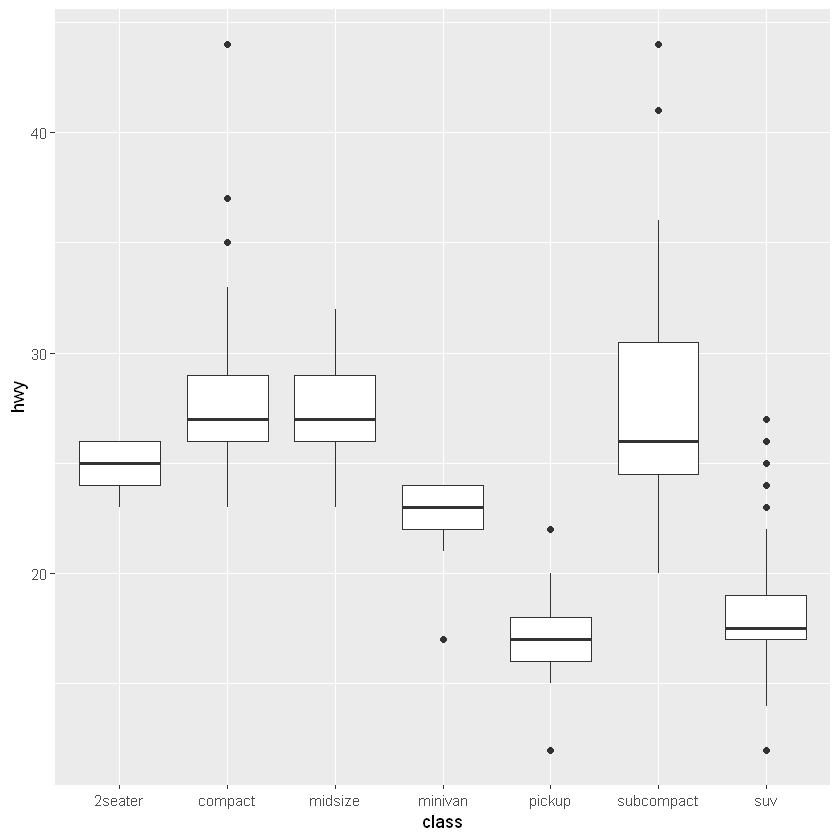

In [20]:
# how highway mileage varies across classes
ggplot(mpg, aes(x = class, y = hwy)) +
    geom_boxplot()

Let's reorder to see the pattern:

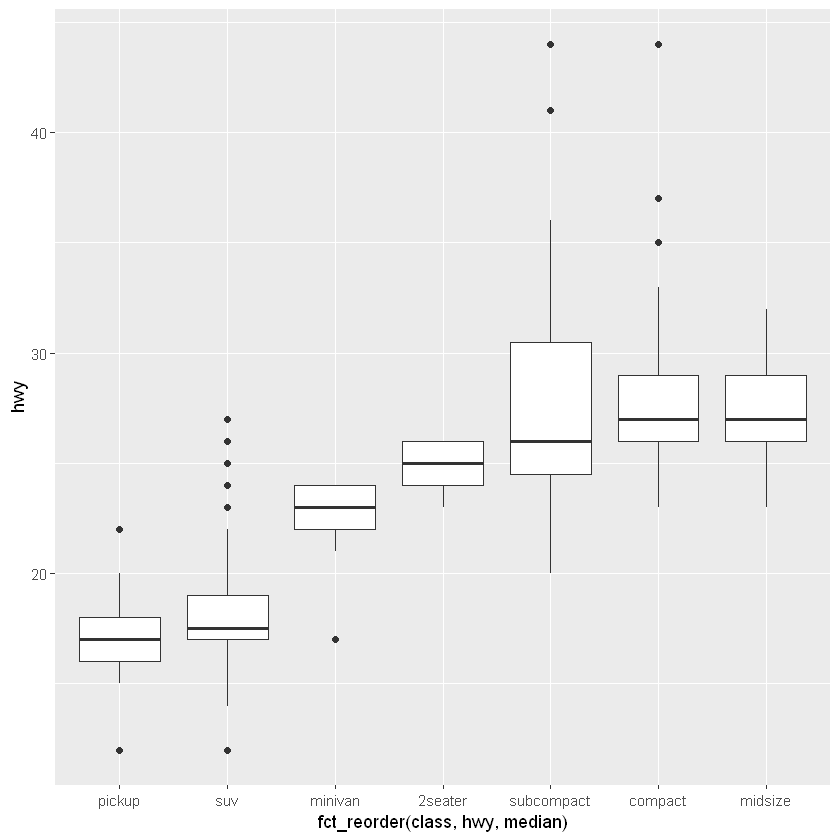

In [21]:
ggplot(mpg, aes(x = fct_reorder(class, hwy, median), y = hwy)) +
    geom_boxplot()

Long variable names? Let's use vertical plot for better visualization.

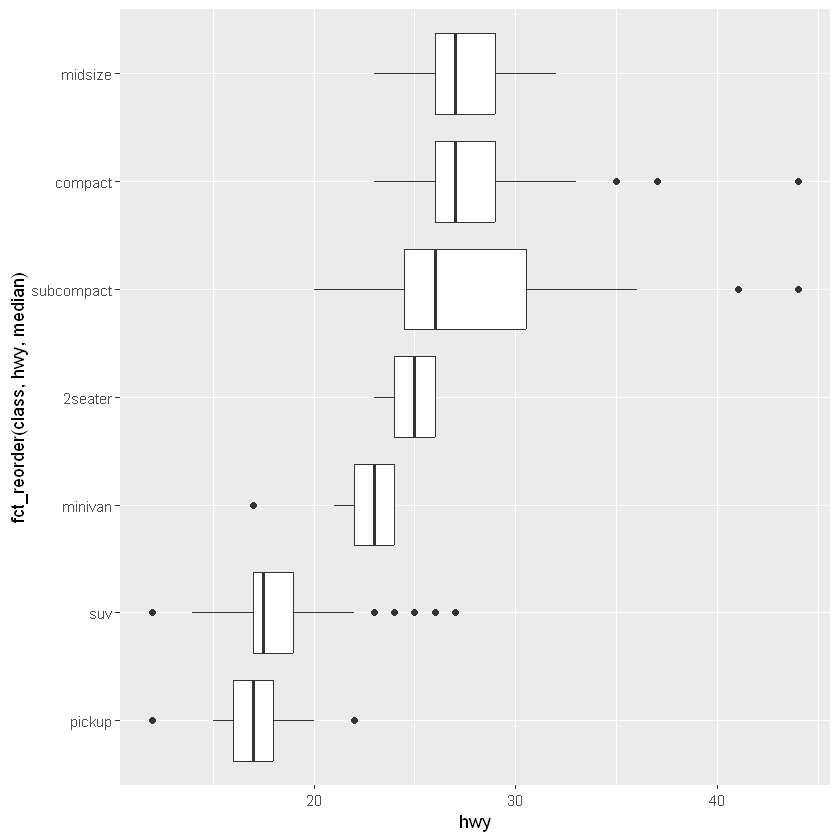

In [22]:
ggplot(mpg, aes(x = hwy, y = fct_reorder(class, hwy, median))) +
    geom_boxplot()

## Two Categorical Variables

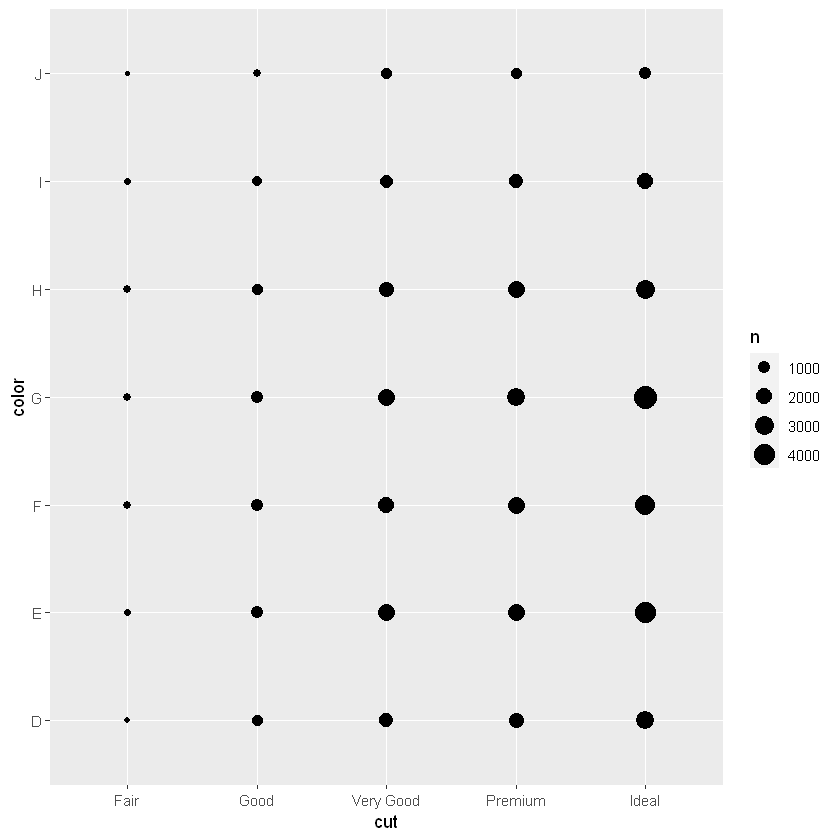

In [23]:
# count the number of obs for each combinations of levels
# of each categorical variables
ggplot(diamonds, aes(x = cut, y = color)) +
    geom_count()

In [24]:
# alternative visualization
diamonds %>%
    count(color, cut) %>%
    head()

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224


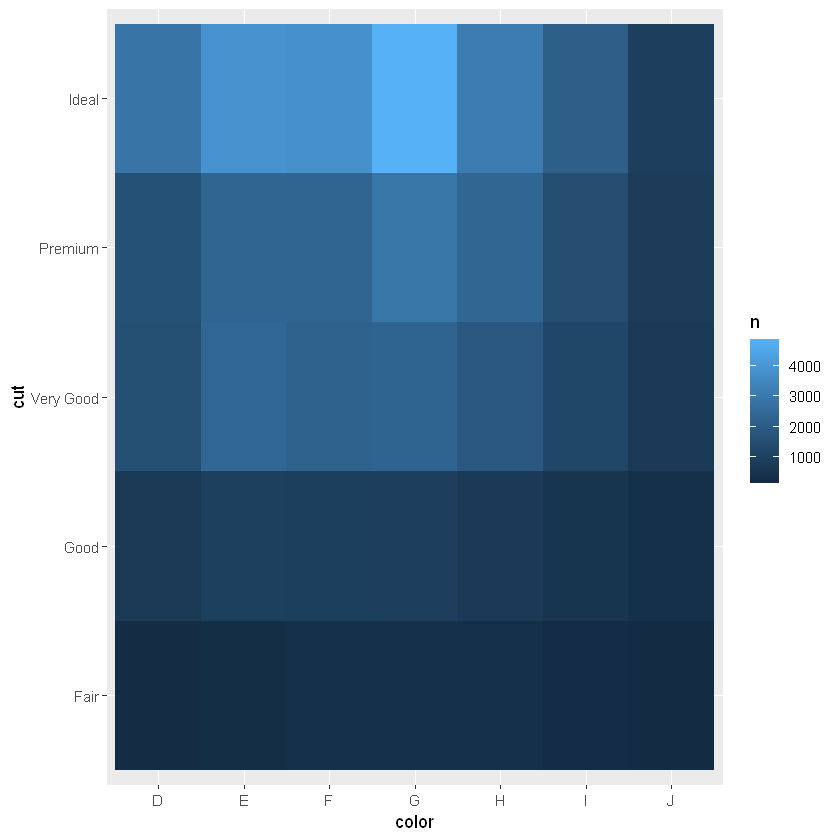

In [25]:
diamonds %>%
    count(color, cut) %>%
    ggplot(aes(x = color, y = cut)) +
    geom_tile(aes(fill = n))

## Two Numerical Variables